# Maratona de Filmes | Relatório Parcial

#### Ellen Shen e Luiza Valezim

## Objetivo do Projeto

**Cenário:** Você quer passar um final de semana assistindo ao máximo de filmes possível, mas há restrições quanto aos horários disponíveis e ao número de títulos que podem ser vistos em cada categoria (comédia, drama, ação, etc).

**Entrada:** Um inteiro N representando o número de filmes disponíveis para assistir e N trios de inteiros (H[i], F[i], C[i]), representando a hora de início, a hora de fim e a categoria do i-ésimo filme. Além disso, um inteiro M representando o número de categorias e uma lista de M inteiros representando o número máximo de filmes que podem ser assistidos em cada categoria.

**Saída:** Um inteiro representando o número máximo de filmes que podem ser assistidos de acordo com as restrições de horários e número máximo por categoria.

A entrada tem o seguinte formato:
```
10 4
1 3 1 2 
11 13 3
14 15 3
10 16 2
10 14 1
11 17 2
11 14 3
13 15 3
14 15 1
12 16 4
12 13 4
```

- `n = 10`: 10 filmes disponíveis.
- `m = 1, 3, 1, 2`: 1 filme para a categoria 1, 3 filmes para a categoria 2, 1 filme para a categoria 3 e 2 filmes para a categoria 4.
- `(H[1], F[1], C[1]) = (11, 13, 3); (H[2], F[2], C[2]) = (14, 15, 3)`: o filme 1 começa às 11h, termina às 13h e pertence a categoria 3 e assim por diante.

Outuput esperado:
```
Foram vistos 2 filmes.
12 13 4
14 15 1
```

# Parcial

## Heurística gulosa

A heurística gulosa, também conhecida como busca gulosa, é um método de resolução de problemas que segue a abordagem "tomar a melhor decisão imediata" em cada etapa do processo de resolução. Em outras palavras, a heurística gulosa escolhe a opção que parece ser a melhor no momento atual, sem considerar as possíveis consequências futuras dessa escolha.

Essa abordagem é comumente usada em problemas de otimização, em que o objetivo é encontrar a solução que maximize ou minimize uma determinada função. Em cada etapa, a heurística gulosa escolhe a opção que maximiza ou minimiza a função objetivo, com base nas informações disponíveis naquele momento.

Apesar de ser uma estratégia simples e rápida, a heurística gulosa pode não levar à melhor solução global do problema, já que as escolhas locais ótimas podem não levar a uma solução global ótima. Por isso, a heurística gulosa é muitas vezes combinada com outras técnicas, como busca em largura ou busca em profundidade, para melhorar a qualidade da solução encontrada.

## Aleatorização

A aleatorização pode ser usada em algoritmos de busca local para explorar diferentes regiões do espaço de soluções e escapar de mínimos locais ou máximos locais. Na busca local, o algoritmo começa com uma solução inicial e, em seguida, tenta melhorar iterativamente a solução encontrando soluções vizinhas melhores.

## Implementação

### Preparação dos dados:

Nosso passo limpar e organizar os dados de entrada e prepará-los para serem utilizados. Dessa maneira, foi criada uma struct `Movie` para organizar os dados no formato `H[i], F[i], C[i]`. A construção da struct abaixo:
```
struct Movie {
  int start;
  int end;
  int genre;
};
```

Foram criadas as variáveis para quantidade de filmes e categorias e um vetor com índice contendo a quantidade de filmes que poderiam ser assistidos em cada categoria. A função cin da biblioteca iostream, recebe o dado de entrada do arquivo na ordem em que ele é lido. Então temos em ordem primeiro a quantidade de filmes e depois a quantidade de categorias. O vetor, foi inicializado com zeros, mas logo podemos substituir seus dados e criar o vetor de filmes.


```
int n_movies, n_genres;
cin >> n_movies>> n_genres;
vector<int> movie_by_genre(n_genres, 0);
Movie empty_movie = {0, 0, 0};
vector<Movie> movies(n_movies, empty_movie);
    
for (int i = 0; i < n_genres; i++){
        cin >> movie_by_genre[i];
    }
```



Primeiramente, é preciso ordenar os filmes de forma crescente em relação ao horário de término, e não ao horário de início. Para realizar a ordenação, utilizamos a função sort() da biblioteca algorithm. Assim, depois podemos ordenar os filmes que acabam no mesmo horário, em crescente em relação ao horário de início.

```
sort(movies.begin(), movies.end(), [] (Movie &a, Movie &b){
    return a.end < b.end;
});

for (int i = 0; i < int(movies.size()); i++){
    if (movies[i].end == movies[i+1].end){
        if (movies[i].start > movies[i+1].start) {
            Movie aux = movies[i];
            movies[i] = movies[i+1];
            movies[i+1] = aux;
        }
    }
}
```

Criamos um dicionário para organizar esses dados:
```
for (int i = 0; i < n_movies; i++){
    myDict[movies[i].fim].push_back(movies[i]);
}
```

Agora podemos implementar os 75% de heurística gulosa e 25% de aleatorização.
- A heurística gulosa seleciona o primeiro filme que encontrar (terminando em um mesmo horário).
- A aleatorização vai sortear um filme (terminando em um mesmo horário).


```
for (int i = 1; i <= 24; i++){
    int sorteio = distribution(generator)*abs(rand()%2);
    if (free_time == hour_mask){
        break;
    }
    if (sorteio == 1){
        greedy(myDict[i], movie_by_genre, free_time, vector_seen_movies, seen_movies);
    } else
    {   
        randomness(myDict[i], movie_by_genre, free_time, vector_seen_movies, seen_movies);
    }
}
```


### Heurística Gulosa

A função da heuristica gulosa recebe as seguintes variáveis:

- `movies[i]`: todos os filmes que terminam em um horário;
- `movie_by_genre`: quantidade de filmes que podem ser assistidos em cada categoria.
- `free_time`: um bitset de tamanho 24.
- `vector_seen_movies`: o vetor de filmes vistos.
- `seen_movies`: número de filmes que poderão ser vistos em um dia.

```
void greedy(vector<Movie> &movies, vector<int> &movie_by_genre, bitset<24> &free_time, vector<Movie> &vector_seen_movies, int &seen_movies) {

    for (int i = 0; i <int(movies.size()); i++){
        bitset<24> hour;
        fill_bitset(hour, movies[i].start-1, movies[i].end-1);
        if ((!(free_time & hour).any()) && (movie_by_genre[movies[i].genre-1] > 0)) {  
            vector_seen_movies.push_back(movies[i]);
            movie_by_genre[movies[i].genre-1]--;
            fill_bitset(free_time, movies[i].start-1, movies[i].end-1);
            return;
        }
    }
}

```

A função utiliza um loop `for` para percorrer todos os filmes do vetor `movies`. Em cada iteração, a função cria um bitset `hour` que representa o horário em que o filme pode ser assistido, preenchendo as horas com valor `1` dentro do intervalo de tempo que o filme está disponível para ser assistido.

Em seguida, é realizada uma verificação para verificar se o horário em que o filme pode ser assistido `hour` está livre no bitset que representa os horários livres para assistir filmes `free_time`. Para isso, é feita uma operação de `AND` entre os dois bitsets, e o método `any()` é aplicado para verificar se há algum valor `1` na interseção dos bitsets. Se o resultado for falso, significa que o horário está disponível para assistir o filme.

Além disso, a função verifica se ainda há filmes disponíveis para serem assistidos do mesmo gênero do filme selecionado. Para isso, é utilizado o vetor `movie_by_genre`, que contém a quantidade de filmes disponíveis para cada gênero. Se houver disponibilidade de filmes do mesmo gênero, o filme é selecionado e adicionado ao vetor `vector_seen_movies`, que armazena os filmes selecionados. O valor correspondente ao gênero do filme selecionado no vetor `movie_by_genre` é decrementado, indicando que um filme desse gênero foi selecionado.

Por fim, o bitset `free_time` é atualizado, marcando como `1` as horas que estão ocupadas com a seleção do filme. A função retorna após selecionar um único filme, de acordo com a lógica do algoritmo guloso.

### Aleatorização

O código da aleatorizacao é responsável por escolher um filme aleatoriamente dentre aqueles que estão disponíveis para serem assistidos, desde que o horário de exibição do filme não conflite com o horário dos filmes já vistos.

Primeiramente, a função cria um vetor vazio chamado `free_on_pause`, que será preenchido com os filmes que não conflitam com o horário já ocupado pelos filmes já vistos e que ainda possuem disponibilidade em seus respectivos gêneros. A partir da linha 4, a função percorre todos os filmes disponíveis na lista de filmes passada como parâmetro, criando um bitset que representa a hora em que o filme começa e termina e checando se esse horário entra em conflito com o horário já ocupado pelos filmes já vistos. Caso o horário do filme não entre em conflito e ainda exista disponibilidade de filmes no seu gênero, o filme é adicionado ao vetor `free_on_pause`.

Em seguida, a função verifica se o vetor `free_on_pause` contém algum filme disponível. Caso não contenha, a função retorna sem fazer nada. Caso contrário, a função seleciona um filme aleatório dentre aqueles que estão no vetor `free_on_pause`, adiciona esse filme ao vetor de filmes já vistos, decrementa a quantidade de filmes disponíveis no seu respectivo gênero e atualiza o bitset `free_time` para marcar o horário em que o filme será exibido.

É importante notar que, caso o vetor `free_on_pause` contenha apenas um filme, ele será o escolhido aleatoriamente. Caso contrário, a função usa a função `rand()` para gerar um número inteiro aleatório que será usado como índice para selecionar um filme aleatório do vetor `free_on_pause`. O valor retornado pela função `rand()` depende do valor da semente passada como argumento da função `srand()`, que nesse caso é o valor `time(NULL)`, que representa o número de segundos passados desde 1 de janeiro de 1970. Isso garante que a sequência de números aleatórios gerados por `rand()` seja diferente a cada execução da função randomness.

```

void randomness(vector<Movie> &movies, vector<int> &movie_by_genre, bitset<24> &free_time, vector<Movie> &vector_seen_movies, int &seen_movies) {
    vector<Movie> free_on_pause;
    if (int(movies.size()) > 1) {
        for (int i = 1; i < int(movies.size()); i++){
            bitset<24> hour;
            fill_bitset(hour, movies[i].start-1, movies[i].end-1);
            if ((!(free_time & hour).any()) && (movie_by_genre[movies[i].genre-1] > 0)) {    
                free_on_pause.push_back(movies[i]);
            }  
        }

        int random_int = 0;

        if (int(free_on_pause.size()) == 0){
            return;
        }
        if (free_on_pause.size() == 1){
            random_int = 0;
        } else{
            int size_myDictItem = int(free_on_pause.size()-1);
            srand(time(NULL));
            random_int = rand() % size_myDictItem+1;
        }

        seen_movies++;
        vector_seen_movies.push_back(free_on_pause[random_int]);
        movie_by_genre[free_on_pause[random_int].genre-1]--;
        fill_bitset(free_time, free_on_pause[random_int].start-1, free_on_pause[random_int].end-1);
    } 
}

```



### Output

No output podemos utilizar o `cout` com `seen_movies` e nossas entradas:

```
cout << seen_movies << " movies" << endl;

    for (int i = 0; i < int(vector_seen_movies.size()); i++){
        cout << vector_seen_movies[i].start << " " << vector_seen_movies[i].end << " " << vector_seen_movies[i].genre << endl;
    }

```

Exemplo de output:

```
2 movies
10 4
1 3 1 2 
11 13 3
14 15 3
10 16 2
10 14 1
11 17 2
11 14 3
13 15 3
14 15 1
12 16 4
12 13 4
```

## Profiling

Para fazer o profiling, seguimos os seguintes passos:

`g++ -g greedy.cpp -Wall -O3 -o ./greedy_random`

`valgrind --tool=callgrind ./greedy_random --benchmark < input_x.txt`

`callgrind_annotate --threshold=0.01 callgrind.out.X greedy_random.cpp > greedy_profiling.txt`


### Conclusão Profiling

Foi possível observar que se a preocupação for minimizar o número de chamadas no código, o ideal seria seguir apenas com a heurística gulosa. Pois com a aleatorização, varremos todos os horários válidos do conjunto de filmes que terminavam no mesmo horário, e depois sorteavamos um desses para fazer parte da solução. Assim, temos mais ações a se fazer com aleatoriedade.

# Benchmark

Ao realizar o benchmark, podemos analisar a performance de cada um dos métodos que utilizamos para resolver o problema proposto para o projeto. Assim, nós conseguiremos obter os valores e a média para cada quantidade de filmes que foi rodado. É importante mencionar que iremos o benchmark com arquivos de 100 mil a 10 milhões de filmes, com o intuito de observarmos se as diferenças são significativas entre eles.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

### Greedy Heuristic Benchmark

In [ ]:
runtime_dict = {0: [], 1: [], 2: [], 3: [], 4: []}
knapsack_movies = {0: [], 1: [], 2: [], 3: [], 4: []}

for i in range(1, 10):
    for j in range(1, 5):
        start_time = time.time()
        !./code/greedy < inputs/in-{j}.txt > outputs/out-{j}.txt
        runtime = time.time() - start_time
        runtime_dict[j].append(runtime)
        with open(f'output/out-{j}.txt', 'r') as f:
          line = f.readline().split()
          knapsack_movies[j].append(int(line[2]))
  
runtime_pd = dict_to_df(runtime_dict)
runtime_pd['mean'] = runtime_pd.mean(axis=1)
runtime_pd.to_csv('benchmark/runtime_greedy.csv', index=False)
knapsack_movies_pd = dict_to_df(knapsack_movies)
knapsack_movies_pd['mean'] = knapsack_movies_pd.mean(axis=1)
knapsack_movies_pd.to_csv('benchmark/greedy_knapsack_movies.csv', index=False)

Para o runtime_pd obtivemos:

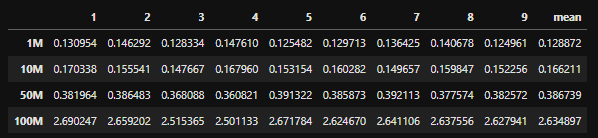

Para o knapsack_movies_pd obtivemos:

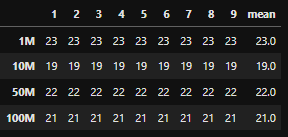

### Random Heuristic Benchmark

In [ ]:
runtime_dict = {0: [], 1: [], 2: [], 3: [], 4: []}
knapsack_movies = {0: [], 1: [], 2: [], 3: [], 4: []}

for i in range(1, 10):
    for j in range(1, 5):
        start_time = time.time()
        !./code/random < inputs/in-{j}.txt > outputs/out-{j}.txt
        runtime = time.time() - start_time
        runtime_dict[j].append(runtime)
        with open(f'output/out-{j}.txt', 'r') as f:
          line = f.readline().split()
          knapsack_movies[j].append(int(line[2]))
  
runtime_pd = dict_to_df(runtime_dict)
runtime_pd['mean'] = runtime_pd.mean(axis=1)
runtime_pd.to_csv('benchmark/runtime_random.csv', index=False)
knapsack_movies_pd = dict_to_df(knapsack_movies)
knapsack_movies_pd['mean'] = knapsack_movies_pd.mean(axis=1)
knapsack_movies_pd.to_csv('benchmark/random_knapsack_movies.csv', index=False)

Para o runtime_pd obtivemos:

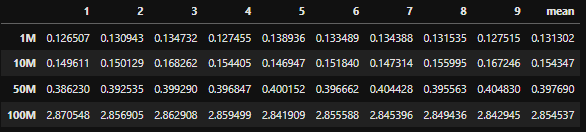

Para o knapsack_movies_pd obtivemos:

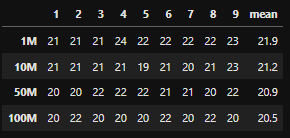

## Graphs

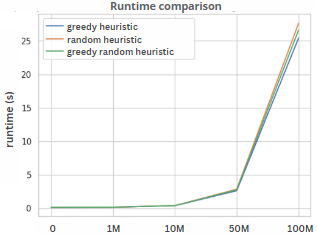

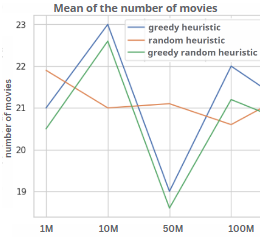

# Final

# Busca Exaustiva

A busca exaustiva, também conhecida como força bruta, é um método utilizado em algoritmos de busca e otimização para encontrar a solução de um problema testando todas as possíveis combinações ou opções. Esse método é chamado de "exaustivo" porque examina todas as alternativas possíveis, independentemente da sua viabilidade ou probabilidade de sucesso.

Ao aplicar a busca exaustiva, todas as soluções candidatas são geradas e testadas uma a uma, até que a solução correta seja encontrada ou todas as possibilidades tenham sido examinadas. Esse processo é geralmente implementado em um loop ou uma recursão, que percorre todas as combinações possíveis.

A busca exaustiva, a heurística gulosa e a aleatorização são abordagens diferentes para resolver problemas, cada uma com suas próprias características e vantagens:

1. Heurística gulosa: A heurística gulosa é uma abordagem que faz escolhas locais ótimas em cada etapa, com o objetivo de alcançar uma solução geralmente boa, mas não necessariamente ótima. Em cada passo, a heurística gulosa seleciona a opção que parece ser a melhor no momento, sem levar em consideração as consequências futuras.

2. Aleatorização: A aleatorização é uma abordagem que envolve a introdução de elementos aleatórios no processo de busca de soluções. Ela pode ser usada em conjunto com outros métodos, como a busca exaustiva ou a heurística gulosa. A aleatorização permite explorar diferentes regiões do espaço de soluções de forma não determinística, o que pode levar a soluções melhores ou a soluções diferentes a cada execução. 

3. Busca exaustiva: A busca exaustiva explora todas as soluções possíveis para um problema, testando cada uma delas. Isso garante que a solução ótima seja encontrada, mas o custo computacional pode ser alto, especialmente quando o espaço de soluções é grande.

A utilização da busca exaustiva em conjunto com a paralelização pode trazer benefícios significativos, especialmente em problemas onde o espaço de soluções é muito grande. Aqui estão algumas razões para utilizar a busca exaustiva com paralelização:

1. Aproveitamento de recursos computacionais: A paralelização permite dividir o trabalho entre vários processadores ou núcleos de um sistema computacional, aproveitando ao máximo os recursos disponíveis. Com a busca exaustiva, é possível distribuir as tarefas de avaliar as soluções candidatas entre os diferentes processadores, acelerando o processo de busca e reduzindo o tempo de execução.

2. Escalabilidade: A paralelização permite escalar o processo de busca exaustiva para lidar com problemas maiores. Conforme o tamanho do espaço de soluções aumenta, a busca exaustiva por si só pode se tornar inviável em termos de tempo de execução. Ao distribuir o trabalho em paralelo, é possível enfrentar problemas de maior complexidade e lidar com uma quantidade maior de soluções candidatas.

3. Exploração simultânea de diferentes soluções: Com a paralelização, é possível explorar simultaneamente diferentes soluções candidatas em diferentes processadores. Isso pode levar a uma maior diversidade de soluções sendo avaliadas em paralelo, potencialmente aumentando as chances de encontrar uma solução ótima ou uma solução satisfatória em menos tempo.

## Paralelização e OpenMP

O OpenMP (Open Multi-Processing) é uma API de programação paralela que facilita a criação de código paralelo em sistemas com múltiplos núcleos de CPU. Ele permite que os desenvolvedores adicionem paralelismo aos seus programas por meio do uso de diretivas de compilação, pragmas e funções específicas. O OpenMP simplifica a criação de aplicativos paralelos e é amplamente utilizado em várias linguagens de programação.

Vamos querer utilizar a maior quantidade de loops possíveis que não tenham dependência de resultados. 
Implementando novas `structs`:

Contém a categoria do filme analisado e o seu bitset preenchido com 1's no intervalo de horas que o filme passa:

```
struct ProcessedMovie{
    int category;
    bitset<24> time;
};
```

Resultado final do programa, contém o número máximo de filmes que podem ser assistidos e o id desses filmes:
```
struct Schedule{
    vector<int> movies;
    int total_movies;
};
```

Adcionamos um vetor para armazenar todas as combinações de filmes válidas e utiliza-lo na função da `busca exaustiva`.
Assim todas as entradas dessa função são: 
- `n`: número total de filmes disponíveis
- `movies`: vetor com as infos sobre os filmes
- `movie_by_genre`: quantidade de filmes que podem ser assistidos em cada categoria.
- `schelude_total`: vetor que sera preenchido com as combinações válidas de filmes.


```
void exaustiva(int n, vector<ProcessedMovie> &movies, vector<int> movie_by_genre, vector<bitset<64>> &schedule_total){

    long int combinations = pow(2, n);
    cout << combinations << endl;
    long int i;
    
    #pragma omp parallel 
    { 
        vector<bitset<64>> private_schedule_total;
        
        #pragma omp parallel for private(schedule_total) 
        
        for (i = 0; i < combinations; i++){
        
            bitset<24> free_time;
            bitset<64> movies_new(i);
            vector<int> movie_by_genre_new = movie_by_genre;
            
            for (int j = 0; j < n; j++){
            
                if (filmes[j] == 1){
                
                    bitset<24> checked_time = free_time & movies[j].time;
                    
                    if (checked_time != 0) {break;}
                    
                    if (movie_by_genre_new[movies[j].genre-1] == 0) {break;}
                    
                    movie_by_genre_new[movies[j].genre-1]--;
                    
                    free_time |= movies[j].time;
                }
                if (j == n-1){
                    private_schedule_total.push_back(movies_new);
                }
            }
        }
        #pragma omp critical
        schedule_total.insert(schedule_total.end(), private_schedule_total.begin(), private_schedule_total.end());
    }
}
```

A variável `combinations` é calculada como 2 elevado ao valor de `n`, representando o número total de combinações possíveis. A diretiva `#pragma omp parallel` inicia uma região paralela, indicando que o bloco de código subsequente será executado por várias threads. Dentro da região paralela, é declarado um vetor que será usado por cada thread para armazenar suas combinações de horários de exibição de filmes.A diretiva `#pragma omp parallel for` cria um loop paralelo, onde cada iteração do loop será executada por uma thread diferente.

O loop itera de 0 até `combinations`, gerando todas as possíveis combinações de horários de exibição de filmes. Dentro do loop, são realizadas as seguintes etapas:

1. Uma variável `free_time` é inicializada como um `bitset` vazio de 24 bits. Essa variável representa os horários disponíveis para a exibição dos filmes.


2. A variável `movies_new` é inicializada como um `bitset` a partir do valor atual de `i`. Essa variável representa a combinação atual de filmes.


3. Uma cópia do vetor `movie_by_genre` é criada como `movie_by_genre_new`.


4. É feito um loop em cada filme `j` de 0 até `n-1`:

  - Se `filmes[j]` (provavelmente deveria ser `movies_new[j]`) for igual a 1, significa que o filme está presente na combinação atual.

  - Um `bitset` chamado `checked_time` é calculado como a interseção entre `free_time` e o horário do filme `j`.

  - Se `checked_time` for diferente de zero, isso significa que há um conflito de horário com filmes anteriores, então o loop é interrompido com o comando `break`.

  - Se a contagem de filmes pelo gênero `movies[j].genre-1` for igual a 0, isso significa que não há mais filmes disponíveis desse gênero, então o loop é interrompido com o comando `break`.

  - Caso contrário, a contagem de filmes pelo gênero é decrementada em 1, indicando que um filme desse gênero foi incluído na combinação atual, e o horário do filme é adicionado a `free_time`.

  - Se `j` for igual a `n-1`, isso significa que todos os filmes foram incluídos na combinação e é seguro adicionar `movies_new` a `private_schedule_total`.

Fora do loop, a diretiva `#pragma omp critical` garante que apenas uma thread por vez possa adicionar suas combinações de horários de exibição ao vetor `schedule_total`. Isso é necessário para evitar condições de corrida. As combinações de horários de exibição de filmes armazenadas em `private_schedule_total` são inseridas no vetor `schedule_total`.

Então podemos relizar uma busca pelo melhor schedule dentre os schedules gerados. Percorrendo os schedules disponíveis, depois conta quantos filmes estão presentes em cada schedule e identifica o schedule com o maior número de filmes. Em seguida, exibimos informações sobre o melhor schedule e retornamos a quantidade de filmes presentes nele.

## Paralelização e GPU

Vamos utilizar a biblioteca Thrust, que é uma biblioteca de programação paralela para C++ desenvolvida pela NVIDIA. Ela fornece um conjunto de algoritmos e estruturas de dados de alto desempenho, projetados para aproveitar a capacidade de processamento paralelo das GPUs (Graphics Processing Units) da NVIDIA.

A Thrust é projetada para ser fácil de usar e oferecer uma abstração de alto nível para programação paralela em GPUs. Ela segue uma abordagem baseada em contêineres, onde as operações são aplicadas a sequências de dados em forma de vetores, matrizes ou outras estruturas de dados.

Nosso passo limpar e organizar os dados de entrada e prepará-los para serem utilizados. Dessa maneira, foi criada uma struct Movie para organizar os dados e os vetores de inicialização com os dados. A construção abaixo:
```
struct Movie {
  int start;
  int end;
  int genre;
};

int n_movies, n_genres;
cin >> n_movies>> n_genres;

thrust::host_vector<int> movie_by_genre(n_genres, 0);

Movie empty_movie = {0, 0, 0};

vector<Movie> movies (n_movies, empty_movie);

for (int i = 0; i < n_genres; i++){
    cin >> movie_by_genre[i];
}

for (int i = 0; i < n_movies; i++){
    Movie movie;
    
    cin >> movie.start >> filme.end >> filme.genre;
    
    if (filme.start == 0) {filme.start = 24;}
    if (filme.end == 0) {filme.end = 24;}
    if (filme.start < 0 || filme.end < 0) continue;
    
    movies[i] = movie;
}
```

Então, preenchemos os horários disponíveis para filmes em um vetor utilizando uma função e armazena as categorias dos filmes em outro vetor. A função usada define os bits correspondentes aos horários disponíveis no parâmetro de horarios dispnveis, considerando diferentes casos de intervalos de horários (indica quais horas estão ocupadas com o bit 1 e quais estão livres com o bit 0)

Assim podemos fazer transformação nos elementos de um vetor usando uma função de busca exaustiva, transferindo os resultados de volta para a CPU e encontrando o valor máximo no vetor resultante para imprimir na tela.

```
struct exaustiva 
{  
    int n_movies;
    int n_genres;
    int* movies_by_genre;
    int* movie_time;
    int* movie_genre;
    
    exaustiva(int n_movies_new, int n_genres_new, int* movies_by_genre_new, int* movie_time_new, int* movie_genre_new) : 
    
    n_movies(n_movies_new), 
    n_genres(n_genres_new),
    movies_by_genre(movies_by_genre_new),
    movie_time(movie_time_new), 
    movie_genre(movie_genre_new) {}
    
    __host__ __device__
    int operator()(const int& config) {
        int free_time = 0;
        int movies_by_genre_aux[99];
        for (int i = 0; i < n_genres; i++){
            movies_by_genre_aux[i] = *(movies_by_genre+i);
        }
        int max_count = 0;
        for (int i = 0; i < n_movies; i++){
            if (config & (1 << i)){
                if (movies_by_genre_aux[movie_genre[i]-1] > 0){
                    int horario_analisado = free_time & *(movie_time + i);
                    if (((horario_analisado) != 0)) return -1;
                    movies_by_genre_aux[movie_genre[i]-1]--;
                    free_time = free_time | *(movie_time + i);
                    max_count += 1;
                }
            }

        }

        return max_count;
    }
};
```

A estrutura implementa um operador de função `operator()`, que recebe um argumento `config` e retorna um valor inteiro.

A estrutura `exaustiva` tem os seguintes membros de dados:


  - `n_movies`: um inteiro que representa o número de filmes.
  
  
  - `n_genres`: um inteiro que representa o número de gêneros de filmes.
  
  
  - `movies_by_genre`: um ponteiro para um array de inteiros que armazena a quantidade de filmes disponíveis por gênero.
  
  
  - `movie_time`: um ponteiro para um array de inteiros que armazena os horários dos filmes.
  
  
  - `movie_genre`: um ponteiro para um array de inteiros que armazena as categorias dos filmes.

O construtor `exaustiva` inicializa os membros de dados da estrutura com os valores fornecidos como argumentos. O operador de função `operator()` recebe um argumento `config` e retorna um valor inteiro.

  - O código cria uma variável `free_time` para rastrear os horários disponíveis.
  
  
  - Cria um array `movies_by_genre_aux` para armazenar temporariamente a quantidade de filmes disponíveis por gênero.
  
  
  - Em um loop, copia os valores de `movies_by_genre` para `movies_by_genre_aux`.
  
  
  - Inicializa a variável `max_count` como 0 para rastrear o número máximo de filmes assistidos.
  
  
  - Em outro loop, itera sobre os filmes:
  
    - Verifica se o `config` tem o bit correspondente ao filme definido (usando a operação `&`).
    
    - Se o bit estiver definido, verifica se há filmes disponíveis no gênero do filme.
    
    - Verifica se o horário do filme não entra em conflito com os horários já agendados (`horario_analisado`).
    
    - Se as condições anteriores forem satisfeitas, decrementa a quantidade de filmes disponíveis no gênero, atualiza os horários agendados (`free_time`) e incrementa `max_count`.
    
    
Retornando o valor final. Em resumo, a estrutura `exaustiva` implementa um operador de função que recebe uma configuração e retorna o número máximo de filmes assistidos, considerando as restrições de horário e quantidade de filmes disponíveis por gênero.

## Diferenças: OpenMP e Thrust

Com os dois executáveis `exaustiva_openmp` e `exaustiva_gpu`, podemos analisar seus outputs com diferentes tipos de categorias.

## Benchmark



In [ ]:
def generate_outputs(file):
    with open(file, 'r') as f:
        line = f.readline().split()
        return int(line[2])

#convert dictionary to dataframe
def dict_to_df_parallel(dict):
    df = pd.DataFrame.from_dict(dict, orient='index')
    df = df.rename(index={0:'quatro', 1:'dez', 2:'vinte quatro', 3:'vinte oito'})
    return df

### OpenMP

In [ ]:
openmp_runtime = {0: [], 1: [], 2: [], 3: []}
openmp_knapsack = {0: [], 1: [], 2: [], 3: []}

for i in range(0, 10):
    for j in range(0, 3):
        start_time = time.time()
        !./exaustiva < inputs/in-{j}.txt > outputs/output{j}.txt
        runtime = time.time() - start_time
        openmp_runtime[j].append(runtime)
        openmp_knapsack[j].append(generate_outputs(f'outputs/output{j}.txt'))

In [ ]:
pd_runtime_openmp = dict_to_df_parallel(openmp_runtime)
pd_runtime_openmp['mean'] = openmp_runtime.mean(axis=1)

In [ ]:
pd_knapsack_openmp = dict_to_df_parallel(openmp_knapsack)
pd_knapsack_openmp['mean'] = openmp_knapsack.mean(axis=1)

In [ ]:
pd_runtime_openmp

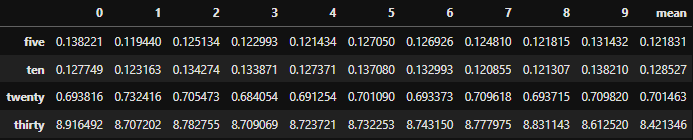

### Thrust

In [ ]:
thurst_runtime = {0: [], 1: [], 2: [], 3: []}
thurst_knapsack = {0: [], 1: [], 2: [], 3: []}

for i in range(0, 10):
    for j in range(0, 4):
        start_time = time.time()
        !./exaustiva_thrust < inputs/in-{j}.txt > outputs/output{j}.txt
        runtime = time.time() - start_time
        thurst_runtime[j].append(runtime)
        thurst_knapsack[j].append(generate_outputs(f'outputs/output{j}.txt'))

In [ ]:
pd_runtime_thurst = dict_to_df_parallel(thurst_runtime)
pd_runtime_thurst['mean'] = pd_runtime_thurst.mean(axis=1)

In [ ]:
pd_knapsack_thurst = dict_to_df_parallel(thurst_knapsack)
pd_knapsack_thurst['mean'] = pd_knapsack_thurst.mean(axis=1)

In [ ]:
pd_runtime_thurst

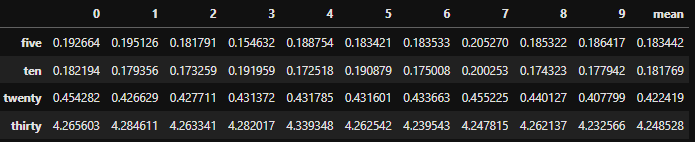

## Comparação dos gráficos obtidos

In [ ]:
sns.lineplot(data=pd_runtime_openmp, x=pd_runtime_openmp.index, y='mean', label='Runtime OpenMP')
sns.lineplot(data=pd_runtime_thurst, x=pd_runtime_thurst.index, y='mean', label='Runtime Thrust')
plt.xlabel('Number of movies (input)')
plt.ylabel('Runtime (s)')
plt.title('Comparing average runtime OpenMP vs Thurst')
plt.legend()
plt.show()

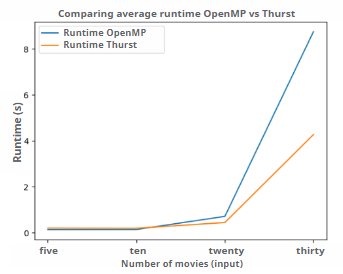
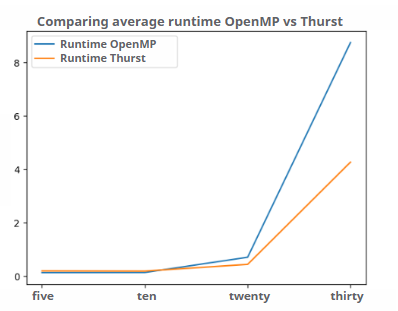
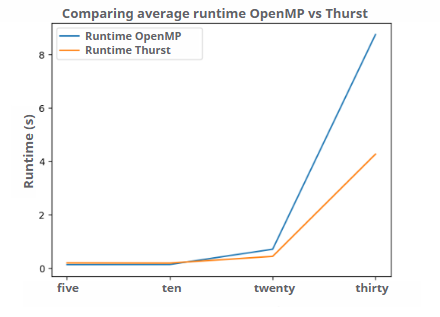
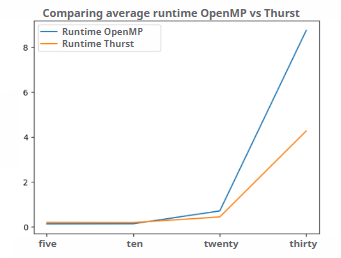

In [ ]:
sns.lineplot(data=pd_knapsack_openmp, x=pd_knapsack_openmp.index, y='mean', label='Knapsack OpenMP')
sns.lineplot(data=pd_knapsack_thurst, x=pd_knapsack_thurst.index, y='mean', label='Knapsack Thrust')
plt.xlabel('Number of movies (input)')
plt.ylabel('Number of movies (output)')
plt.title('Comparing number of watched movies OpenMP vs Thurst')
plt.legend()
plt.show()

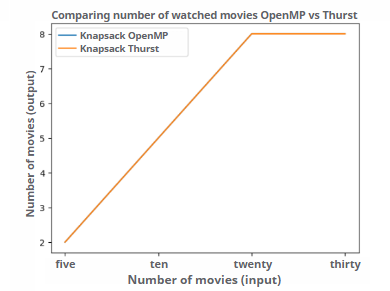

### Análise dos gráficos

Analisando os gráficos, podemos observar que, de forma previsível, ambos os métodos calculam o mesmo número de filmes assistidos, chegando ao resultado global ótimo. No entanto, existe uma discrepância significativa no tempo necessário para obter esse resultado, mesmo com entradas pequenas. Isso provavelmente ocorre devido ao hardware utilizado para paralelizar as operações: o OpenMP aproveita os núcleos da CPU, enquanto o Thrust utiliza os núcleos da GPU.

Apesar dos núcleos da CPU possuírem maior poder de processamento, eles são menos numerosos. Como resultado, cada núcleo da CPU precisa lidar com uma carga maior de tarefas em comparação com um único núcleo da GPU. Essa diferença ocorre devido à natureza original do design da CPU, que foi otimizada para um desempenho superior em tarefas individuais e só recentemente passou a incorporar mais núcleos. Por outro lado, a GPU foi concebida desde o início para lidar com várias tarefas simultaneamente, utilizando vetores para operações gráficas e, mais recentemente, expandindo-se para incluir cálculos matriciais e outros tipos de cálculos paralelos.

# Conclusão

Em resumo, foi observado que a heurística gulosa é mais eficaz do que a heurística gulosa com aleatoriedade para a tarefa de assistir ao máximo de filmes possível. Contudo, quando se trata de minimizar o tempo de execução e reduzir as horas ociosas, a heurística gulosa com aleatoriedade apresenta melhor desempenho. 

Uma possível explicação para esse resultado é que a heurística gulosa seleciona os filmes mais longos primeiro, o que pode limitar as opções para os filmes mais curtos posteriormente. Por outro lado, a heurística com aleatoriedade pode ser mais eficiente ao selecionar filmes curtos no início e deixar as opções para filmes longos mais tarde. No entanto, essa abordagem pode levar a uma seleção ineficiente das categorias. 

Em síntese, a heurística gulosa sem aleatoriedade é mais determinística e prioriza o número de filmes assistidos, enquanto a heurística gulosa com aleatoriedade é mais aleatória e enfatiza a eficiência do tempo de tela, mas pode sacrificar algumas categorias de filmes.

Outra abordagen considerada para o problema de agendamento de filmes foi a busca exaustiva, que consiste em testar todas as possibilidades de agendamento para encontrar a solução ideal. Essa abordagem é conhecida por fornecer resultados ótimos, mas possui um alto custo computacional. Ela requer processamento e memória significativos, já que precisa percorrer todas as combinações possíveis de horários.

Para otimizar o desempenho do algoritmo, foram empregadas técnicas de paralelização utilizando as bibliotecas OpenMP e Thrust. O OpenMP é uma biblioteca que permite a paralelização de tarefas em sistemas de memória compartilhada, distribuindo o processamento em vários threads que executam simultaneamente o cálculo dos horários de agendamento. Isso resulta em uma redução significativa no tempo de execução, aproveitando o poder computacional disponível.

Além disso, foi utilizada a biblioteca Thrust, projetada para programação paralela em GPUs (Graphics Processing Units). Com a Thrust, é possível tirar proveito do poder de processamento das GPUs para acelerar o cálculo dos horários de agendamento, obtendo resultados mais rápidos em comparação com a execução sequencial em CPU.

Embora essas abordagens de paralelização tenham se mostrado eficazes em reduzir o tempo de execução, é importante destacar que a busca exaustiva ainda pode ser inviável para um grande número de filmes, a menos que haja um investimento significativo em hardware. Isso ocorre devido à explosão combinatorial das possibilidades de agendamento, que requerem um tempo e recursos computacionais consideráveis.

Diante dessa realidade, a estratégia que combina heurísticas gulosas com aleatorização se mostrou mais eficiente. Essa abordagem permite explorar propriedades importantes do problema de agendamento de filmes, evitando ficar preso em soluções subótimas. A heurística gulosa enfoca a obtenção de resultados determinísticos, reduzindo o tempo de execução ao limitar o conjunto de soluções. Por outro lado, a aleatorização introduz uma certa dose de aleatoriedade, permitindo explorar diferentes soluções e evitar ficar preso em ótimos locais.

Ao combinar essas duas abordagens, é possível obter resultados satisfatórios em um tempo razoável. Essa estratégia equilibra a eficiência do algoritmo, explorando as propriedades do problema e evitando soluções subótimas, sem incorrer nos altos custos computacionais da busca exaustiva.

### Referências

https://insper.github.io/supercomp/

